In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [93]:
def width2var(w):
    var = (w/2)**2
    return var

In [94]:
# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (8))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 450, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (40))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'


In [95]:
data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(data.shape)
print(data)
print(locs)
print(rents)

(78, 3)
[[120.92904175 501.70130718  24.7465852 ]
 [132.65527757 286.50408313  22.40429217]
 [ 48.19379022 584.40764069  29.02432715]
 [ 61.55879552 541.97338872  23.9011834 ]
 [ 73.46597245 405.2934005   25.1312781 ]
 [123.56447678 556.57382275  24.29364123]
 [ 20.63312292 489.50652335  22.81507659]
 [ 62.34564681 519.91508928  28.0899555 ]
 [511.84189299 365.05336074  32.77078836]
 [506.58458837 418.11837542  34.92191756]
 [536.25491488 385.64827632  30.46318474]
 [433.3475871  399.46752561  38.15215842]
 [552.9553992  438.23508609  38.07991653]
 [521.23920017 448.31271202  37.39774361]
 [562.25279269 394.63545265  35.24375291]
 [449.49831425 457.44612992  35.0002154 ]
 [445.53574881 451.31599207  39.63985774]
 [466.74068405 367.96160639  38.0882812 ]
 [486.15301975 374.06452768  32.37200723]
 [485.89630772 521.53251499  38.47153918]
 [432.09813861 404.129415    34.9541855 ]
 [486.47225174 419.40333724  34.6787724 ]
 [435.38475011 467.65506602  33.02697993]
 [519.77468879 435.6846648

(874, 620, 3)


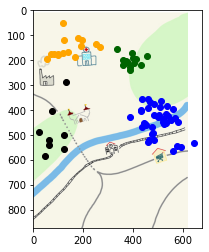

In [96]:
img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)


In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=10, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

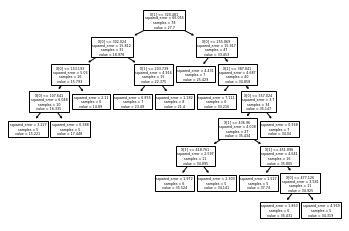

In [98]:
tree.plot_tree(model)
None

In [99]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
with open('aiPythonTree.json', 'w') as f:
    json.dump(dict, f)

print(type(data.tolist()))
print(img.shape)
mietdaten = np.copy(data)
mietdaten[:,0] = data[:,0]/img.shape[1]*100
mietdaten[:,1] = data[:,1]/img.shape[0]*100
mietdaten = mietdaten.astype(int)
mietdaten = {"data": mietdaten.tolist()}
with open('mietdaten.json', 'w') as f:
    json.dump(mietdaten, f)




<class 'list'>
(874, 620, 3)


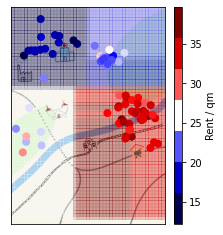

In [100]:
import matplotlib

img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None